Available columns: ['Unnamed: 0', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5']


C:\Users\aajer\my_tensorflow_project\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1115
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0268 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 
Epoc

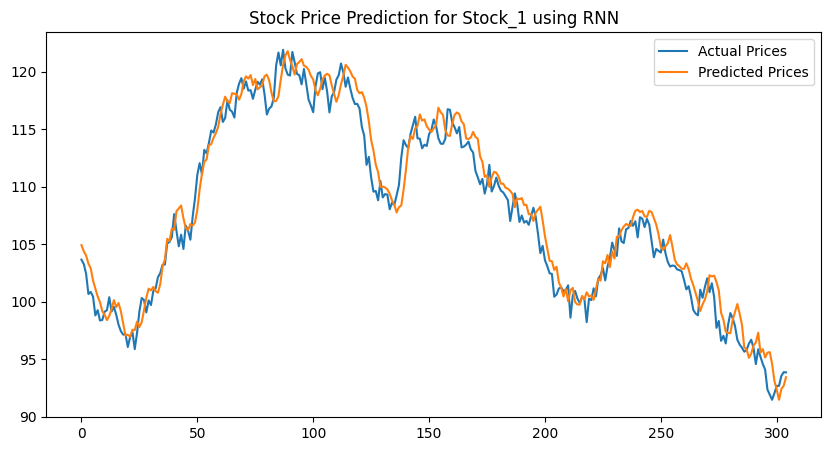

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# -------------------------------
# Load stock data
# -------------------------------
data = pd.read_csv(r"D:\DL-1-7\stock_data.csv")
print("Available columns:", data.columns.tolist())

# Choose which stock to predict
target_stock = 'Stock_1'   # you can change to 'Stock_2', 'Stock_3', etc.

# Extract prices
prices = data[target_stock].values.reshape(-1, 1)

# -------------------------------
# Normalize data
# -------------------------------
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# -------------------------------
# Create sequences
# -------------------------------
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(prices_scaled, seq_length)

# Reshape for RNN [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# -------------------------------
# Build RNN model
# -------------------------------
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# -------------------------------
# Train model
# -------------------------------
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# -------------------------------
# Predictions
# -------------------------------
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# -------------------------------
# Plot results
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(actual, label="Actual Prices")
plt.plot(predictions, label="Predicted Prices")
plt.legend()
plt.title(f"Stock Price Prediction for {target_stock} using RNN")
plt.show()
